In [15]:
import os

colab = True
# #### COLAB ONLY CELL
if colab:
    from google.colab import drive
    drive.mount('/content/gdrive')
    # drive.mount('/content/gdrive',force_remount=True)
    os.chdir("/content/gdrive/MyDrive/COMEXT")
    !pip install -q -r world-trade-thesis/requirements.txt
    !pwd
else:
    os.chdir("H:/My Drive/COMEXT")
    !pwd

import random, math, os, pickle, sys, powerlaw, hashlib #,eurostat
import pandas as pd
import numpy as np
import networkx as nx
from tqdm.notebook import tqdm, trange
from networkx.readwrite import json_graph
from networkx.classes.function import degree
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from scipy.optimize import curve_fit
# from sklearn.preprocessing import MinMaxScaler


if colab:
    sys.path.append('/content/gdrive/MyDrive/COMEXT/world-trade-thesis/src')
else:
    sys.path.append('H:/My Drive/COMEXT/world-trade-thesis/src')
import graph_analysis as g
# exec(open("world-trade-thesis/src/graph_analysis.py","r").read())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/COMEXT


In [ ]:
# exec(open("world-trade-thesis/src/graph_analysis.py","r").read())

Functions loaded!


## Nomenclatures

In [ ]:
df_complete = g.load_filtered_data("complete", save=True, force_reload=True, columns=g.full_columns, types=g.full_types, 
                        group_by_prod_code=False, n_digits=2, years=[2019], months=None, product="all", 
                        flow="all", trade_type="all", declarant_iso="all", partner_iso="all")

loading complete: 

2019 ,	 Table loaded


In [ ]:
df_wto19 = pd.read_parquet("./data-samples/wto/Years/wto201952.parquet")

In [ ]:
df_wto19.astype(g.full_types)

In [ ]:
df_wto = g.load_filtered_data("wto", save=True, force_reload=True, columns=g.full_columns, types=g.full_types, 
                        group_by_prod_code=False, n_digits=2, years=[2019], months=None, product="all", 
                        flow="all", trade_type="all",  declarant_iso="all", partner_iso="all")

loading wto: 

2019 ,	 Table loaded


In [ ]:
df_wto

,PRODUCT_CPA2_1,DECLARANT_ISO,PARTNER_ISO,FLOW,PERIOD,VALUE_IN_EUROS,QUANTITY_IN_KG
0,TOTAL,EU,CN,1,201952,407670435368,0
1,TOTAL,US,CN,1,201952,397976156388,0
2,TOTAL,US,MX,1,201952,309919808224,0
3,TOTAL,US,CA,1,201952,266419196955,0
4,TOTAL,EU,US,1,201952,242370543978,0
...,...,...,...,...,...,...,...
643730,2012,CA,GT,1,201952,0,0
643731,0812,NA,GT,1,201952,0,0
643732,2011,ZA,ZM,1,201952,0,0
643733,2011,ZA,KE,1,201952,0,0


In [ ]:
df_complete

In [ ]:
cpa = g.files_dict["full"]

In [ ]:
cpa["level"] = cpa.code.str.len()

In [ ]:
cpa_l2 = cpa[cpa.level == 2]

## full tex 

In [ ]:
df_full = pd.read_parquet("./data-samples/full/Months/full200101.parquet")

In [ ]:
col_l = ['DECLARANT', 'DECLARANT_ISO', 'PARTNER', 'PARTNER_ISO', 'TRADE_TYPE',
       'PRODUCT_NC', 'PRODUCT_SITC', 'PRODUCT_cpa2002', 'PRODUCT_cpa2008',
       'PRODUCT_CPA2_1', 'PRODUCT_BEC', 'PRODUCT_SECTION', 'FLOW',
       'PERIOD', 'VALUE_IN_EUROS',
       'QUANTITY_IN_KG']

In [ ]:
# df_full.sort_values("VALUE_IN_EUROS",ascending=False, inplace=True)
df_full_tex = df_full[df_full.VALUE_IN_EUROS > 10000][col_l].sample(frac=1).head(50)

In [ ]:
print(df_full_tex.reset_index(drop=True).to_latex("world-trade-thesis/tex/tables/table.tex",index=False))

None


<ipython-input-6-455e4b555770>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_full_tex.reset_index(drop=True).to_latex("world-trade-thesis/tex/tables/table.tex",index=False))


In [ ]:
df_full_tex.to_latex()

## nom tex

In [ ]:
countries = pd.read_table("./data-samples/nomenclature/PARTNER_ISO.txt",header=None,na_filter=None)

In [ ]:
c_tex = countries[[0,3]].drop_duplicates().rename(columns={0:"ISO 2 CODE",3:"COUNTRY NAME"})
c_tex.to_latex("world-trade-thesis/tex/tables/table_iso.tex",index=False,longtable=True)

<ipython-input-3-25a129f29d2c>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  c_tex.to_latex("world-trade-thesis/tex/tables/table_iso.tex",index=False,longtable=True)


In [ ]:
pd.set_option('display.max_colwidth', 255)

In [ ]:
c_tex.iloc[:287//2].shape, c_tex.iloc[287//2:].shape

((143, 2), (144, 2))

In [ ]:
c_tex2 = pd.concat([c_tex.iloc[:(287//2+1)].reset_index(drop=True), c_tex.iloc[(287//2+1):].reset_index(drop=True)],axis=1)

In [ ]:
c_tex2.to_latex("world-trade-thesis/tex/tables/table_iso.tex",index=False,longtable=True)

<ipython-input-19-0c2855509758>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  c_tex2.to_latex("world-trade-thesis/tex/tables/table_iso.tex",index=False,longtable=True)


## Growth plot

In [16]:
# df = g.load_filtered_data("full", save=True, force_reload=False, columns=g.full_columns, types=g.full_types, 
#                         group_by_prod_code=False, n_digits=2, years="all", months="all", product=["TOTAL"], 
#                         flow="all", trade_type="all", declarant_iso="all", partner_iso="all")
df_pop, eu_iso = g.load_population_df()

loading full: 

  0%|          | 0/21 [00:00<?, ?it/s]

2001 

  0%|          | 0/12 [00:00<?, ?it/s]

2002 

  0%|          | 0/12 [00:00<?, ?it/s]

2003 

  0%|          | 0/12 [00:00<?, ?it/s]

2004 

  0%|          | 0/12 [00:00<?, ?it/s]

2005 

  0%|          | 0/12 [00:00<?, ?it/s]

2006 

  0%|          | 0/12 [00:00<?, ?it/s]

2007 

  0%|          | 0/12 [00:00<?, ?it/s]

2008 

  0%|          | 0/12 [00:00<?, ?it/s]

2009 

  0%|          | 0/12 [00:00<?, ?it/s]

2010 

  0%|          | 0/12 [00:00<?, ?it/s]

2011 

  0%|          | 0/12 [00:00<?, ?it/s]

2012 

  0%|          | 0/12 [00:00<?, ?it/s]

2013 

  0%|          | 0/12 [00:00<?, ?it/s]

2014 

  0%|          | 0/12 [00:00<?, ?it/s]

2015 

  0%|          | 0/12 [00:00<?, ?it/s]

2016 

  0%|          | 0/12 [00:00<?, ?it/s]

2017 

  0%|          | 0/12 [00:00<?, ?it/s]

2018 

  0%|          | 0/12 [00:00<?, ?it/s]

2019 

  0%|          | 0/12 [00:00<?, ?it/s]

2020 

  0%|          | 0/12 [00:00<?, ?it/s]

2021 

  0%|          | 0/12 [00:00<?, ?it/s]

,	 Table loaded


In [24]:
df_sum = df[df.PARTNER_ISO.isin(eu_iso)].groupby("PERIOD").sum()

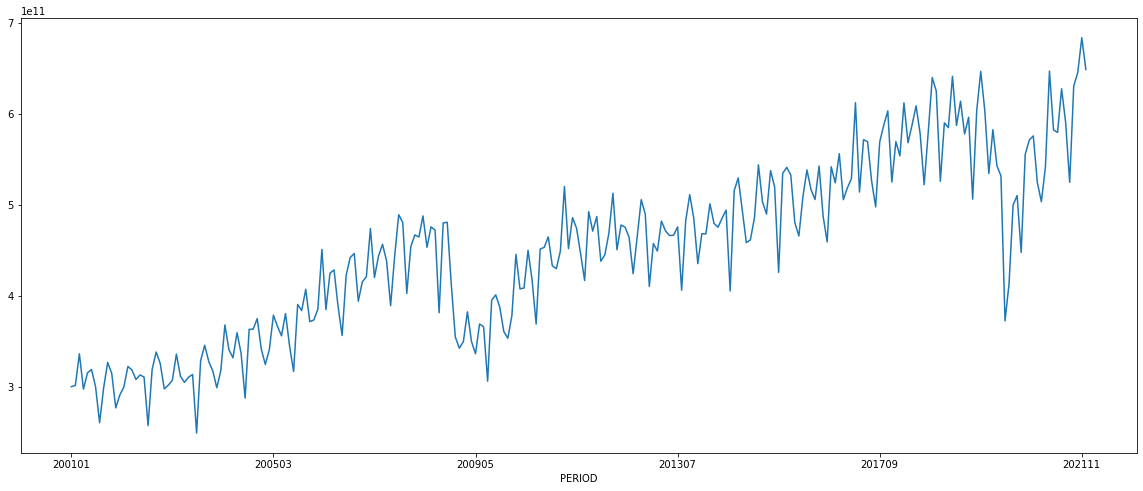

In [27]:
df_sum.VALUE_IN_EUROS.plot(figsize=(20,8))

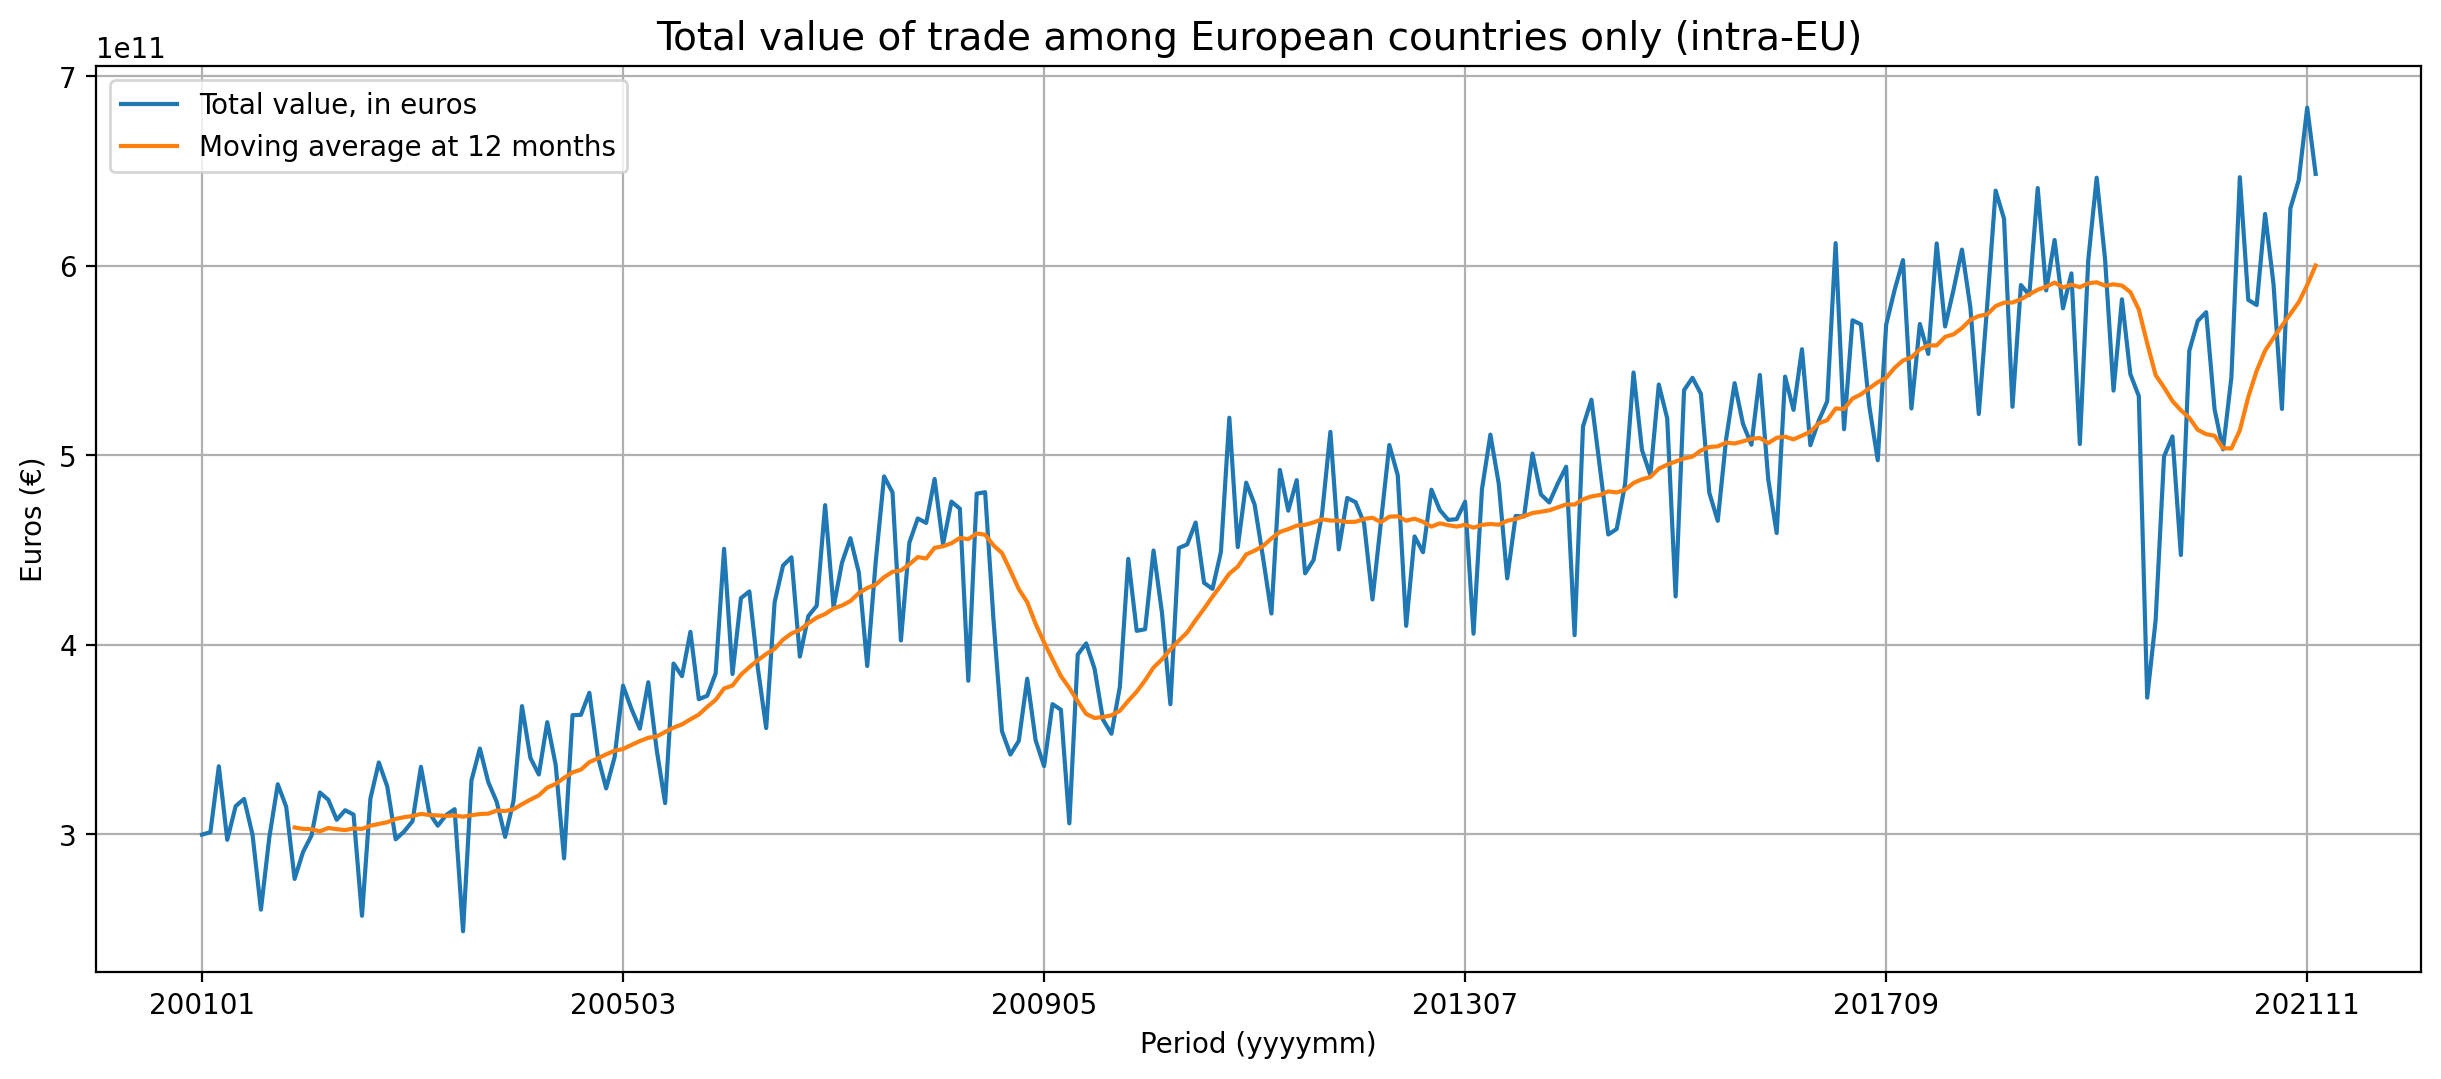

In [52]:
plt.figure(figsize=(15,6),dpi=200,facecolor="w")
df_sum.VALUE_IN_EUROS.plot(label="Total value, in euros")
df_sum.VALUE_IN_EUROS.rolling(12).mean().plot(label="Moving average at 12 months")
plt.ylabel("Euros (€)",fontsize=10)
plt.xlabel("Period (yyyymm)",fontsize=10)
plt.title("Total value of trade among European countries only (intra-EU)",fontsize=14)
plt.legend()
# plt.savefig("./world-trade-thesis/tex/pics/TOTAL_EU.png")
plt.grid()
plt.show()